# TP5  - CART et Forêts Aléatoires

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

## Question 1

In [2]:
df = pd.read_csv('spam.csv', index_col=0)
X = df.drop(columns='type')
y = df['type'].map({'spam':1,'nonspam':0})
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1)

## Question 2

In [3]:
error_DTC = []
for i in range(1, 40):
    DTC = DecisionTreeClassifier(max_depth=i)
    DTC.fit(X_train, y_train)
    y_pred_DTC = DTC.predict(X_test)
    error_DTC.append(1 - accuracy_score(y_test, y_pred_DTC))    

Text(0, 0.5, 'Erreur')

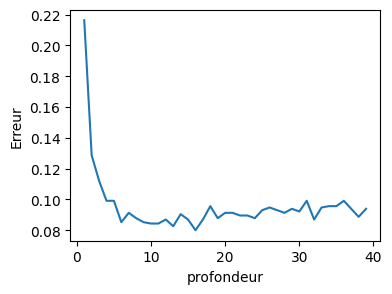

In [4]:
plt.figure(figsize=(4,3))
plt.plot(np.arange(1,40), error_DTC)
plt.xlabel('profondeur')
plt.ylabel('Erreur')

## Question 3

meilleur profondeur :15
accuracy : 0.9165942658557776
     0    1
0  665   36
1   60  390


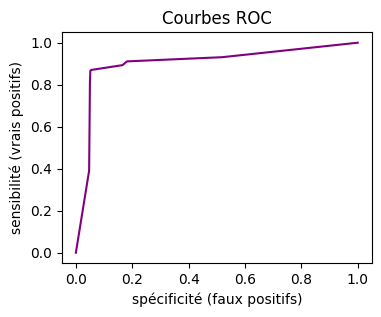

In [5]:
best_depth = error_DTC.index(min(error_DTC))
print(f'meilleur profondeur :{best_depth}')
DTC_best = DecisionTreeClassifier(max_depth=best_depth)
DTC_best.fit(X_train, y_train)

y_pred_best = DTC_best.predict(X_test)
conf_matrix_best = pd.DataFrame(confusion_matrix(y_test, y_pred_best))
print(f'accuracy : {accuracy_score(y_test, y_pred_best)}')
print(conf_matrix_best)

y_proba_DTC = DTC_best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_DTC, drop_intermediate=False)

plt.figure(figsize=(4,3))
plt.xlabel('spécificité (faux positifs)')
plt.ylabel('sensibilité (vrais positifs)')
plt.title('Courbes ROC')
plt.plot(fpr, tpr, color='purple')

## Question 4

In [6]:
param_grid_ = {'max_depth': range(1,25)}
GSCV_DTC = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_)
GSCV_DTC.fit(X_train, y_train)
y_pred_GSCV_DTC = GSCV_DTC.predict(X_test)

y_proba_GSCV_DTC = GSCV_DTC.predict_proba(X_test)[:,1]

accuracy : 0.9087749782797567
     0    1
0  662   39
1   66  384


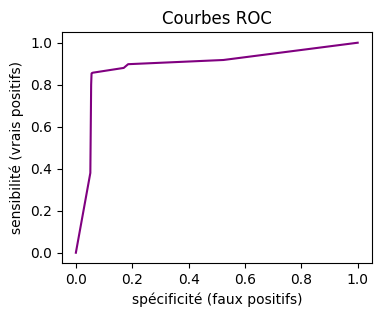

In [7]:
conf_matrix_GSCV_DTC = pd.DataFrame(confusion_matrix(y_test,y_pred_GSCV_DTC))
print(f'accuracy : {accuracy_score(y_test, y_pred_GSCV_DTC)}')
print(conf_matrix_GSCV_DTC)

fpr_GSCV_DTC, tpr_GSCV_DTC, thresholds_GSCV_DTC = roc_curve(y_test, y_proba_GSCV_DTC)
plt.figure(figsize=(4,3))
plt.xlabel('spécificité (faux positifs)')
plt.ylabel('sensibilité (vrais positifs)')
plt.title('Courbes ROC')
plt.plot(fpr_GSCV_DTC, tpr_GSCV_DTC, color = 'purple')

## Question 5

In [8]:
LR = LogisticRegression(max_iter=5000)
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
y_proba_LR = LR.predict_proba(X_test)[:,1]

accuracy : 0.9365768896611643
     0    1
0  679   22
1   51  399


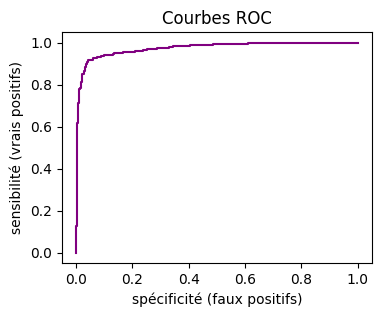

In [9]:
conf_matrix_LR = pd.DataFrame(confusion_matrix(y_test, y_pred_LR))

print(f'accuracy : {accuracy_score(y_test, y_pred_LR)}')
print(conf_matrix_LR)

fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_proba_LR)
plt.figure(figsize=(4,3))
plt.xlabel('spécificité (faux positifs)')
plt.ylabel('sensibilité (vrais positifs)')
plt.title('Courbes ROC')
plt.plot(fpr_LR, tpr_LR, color='purple')

## Comparaison des courbes ROC des 3 modèles

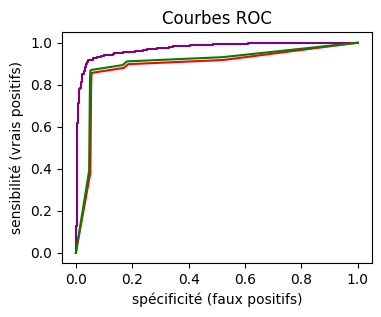

In [10]:
plt.figure(figsize=(4,3))
plt.xlabel('spécificité (faux positifs)')
plt.ylabel('sensibilité (vrais positifs)')
plt.title('Courbes ROC')
plt.plot(fpr_LR, tpr_LR, color='purple')
plt.plot(fpr_GSCV_DTC, tpr_GSCV_DTC, color = 'red')
plt.plot(fpr, tpr, color='green')

## Question 6

In [16]:
'''
RandomForestClassifier, hyperparamètres :
max_features : soit 'sqrt', soit 'log2'
'''
param_grid_RFC = {'n_estimators': [10, 30, 50], 'max_features':['sqrt','log2']}
GRD_RFC = GridSearchCV(RandomForestClassifier(), param_grid = param_grid_RFC)
GRD_RFC.fit(X_train, y_train)
y_pred_GRD_RFC = GRD_RFC.predict(X_test)
y_proba_GRD_RFC = GRD_RFC.predict_proba(X_test)[:,1]

les meilleurs paramètres sont : {'max_features': 'sqrt', 'n_estimators': 50}
Accuracy : 0.9643788010425717
     0    1
0  687   14
1   27  423


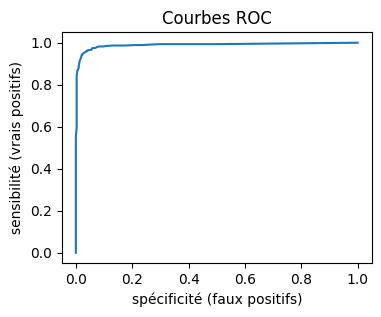

In [ ]:
conf_matrix_GRD_RFC = pd.DataFrame(confusion_matrix(y_test, y_pred_GRD_RFC))
fpr_GRD_RFC, tpr_GRD_RFC, thresholds_GRD_RFC = roc_curve(y_test, y_proba_GRD_RFC)

print(f'les meilleurs paramètres sont : {GRD_RFC.best_params_}')
print(f'Accuracy : {accuracy_score(y_test, y_pred_GRD_RFC)}')
print(conf_matrix_GRD_RFC)
plt.figure(figsize=(4,3))
plt.xlabel('spécificité (faux positifs)')
plt.ylabel('sensibilité (vrais positifs)')
plt.title('Courbes ROC')
plt.plot(fpr_GRD_RFC, tpr_GRD_RFC)

## Question 7

### (a)

In [21]:
BGC_5 = BaggingClassifier(RandomForestClassifier(), n_estimators = 5)
BGC_5.fit(X_train, y_train)
y_pred_BGC_5 = BGC_5.predict(X_test)
print(f'Erreur pour 5 arbres : {1 - accuracy_score(y_test, y_pred_BGC_5)}')

Erreur pour 5 arbres : 0.04083405734144219


In [22]:
BGC_50 = BaggingClassifier(RandomForestClassifier(), n_estimators = 50)
BGC_50.fit(X_train, y_train)
y_pred_BGC_50 = BGC_50.predict(X_test)
print(f'Erreur pour 50 arbres : {1 - accuracy_score(y_test, y_pred_BGC_5)}')

Erreur pour 50 arbres : 0.04083405734144219


### (b)

In [ ]:
BGC_noeud = BaggingClassifier(RandomForestClassifier(max_depth=1), n_estimators = 50)
BGC_noeud.fit(X_train, y_train)
y_pred_noeud = BGC_noeud.predict(X_test)
print(f'Erreur pour 50 arbres et 1 noeud : {1 - accuracy_score(y_test, y_pred_noeud)}')

Erreur pour 50 arbres et 1 noeud : 0.16159860990443098


### (c) 
Faire un modèle de bagging avec 50 arbres de décision profonds revient à faire la question (a) car le programme fait en sorte que toutes les branches soient pures.

## Question 8

### (a)

In [26]:
ABC = AdaBoostClassifier(RandomForestClassifier(), n_estimators=50, algorithm = 'SAMME')
ABC.fit(X_train, y_train)
y_pred_ABC = ABC.predict(X_test)
print(f'Erreur pour 50 arbres (Adaboost) : {1 - accuracy_score(y_test, y_pred_ABC)}')

Erreur pour 50 arbres (Adaboost) : 0.037358818418766315


### (b)

In [27]:
ABC_noeud = AdaBoostClassifier(RandomForestClassifier(max_depth = 1), n_estimators=50, algorithm = 'SAMME')
ABC_noeud.fit(X_train, y_train)
y_pred_ABC_noeud = ABC_noeud.predict(X_test)
print(f'Erreur pour 50 arbres et 1 noeud (Adaboost) : {1 - accuracy_score(y_test, y_pred_ABC_noeud)}')

Erreur pour 50 arbres et 1 noeud (Adaboost) : 0.06168549087749786


### (c)

In [ ]:
model_xgb = xgb.XGBClassifier(n_estimators = 50)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print(f'Erreur pour XgBoost : {1 - accuracy_score(y_test, y_pred_xgb)}')

Erreur pour XgBoost : 0.04952215464813203
